# **Data Analysis Project: RFM Analysis with E-Commerce Public Dataset**
By Haris Yafie

Email: yafie345@gmail.com

# **Intro**


Brazilian e-commerce public dataset of orders made at Olist Store. This dataset has information on 100 thousand orders from 2016 to 2018 made in several marketplaces in Brazil. Its features allow viewing orders from various dimensions: from order status, price, payment, freight performance to customer location to customer location, product attributes, and reviews written by customers. (Kaggle)

From this dataset, several questions are asked to be answered logically and using the data as material for decision making. The questions I ask from the dataset are the following.

1. How is the segmentation of customers based on order recency, order frequency, and transaction value?
2. What is the distribution of customers who used e-commerce the last time they placed an order?
3. Which countries have the most and fewest customer orders?
4. Which country has the highest total and average transaction value?
5. Which month has the highest total and average transaction value?

Therefore, below I carry out data analysis using Recency, Frequency, and Monetary Analysis (RFM) so that I can conclude information to help in decision making.

# **Data Wrangling**
The first step in data analysis is to carry out Data Wrangling starting from data collection to data cleaning so that I can analyze the data well

## Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from babel.numbers import format_currency

## Gathering Data

In [2]:
!gdown 1V0mBL1G3igMjAsap1Oy1z4zi_E5CeYFZ #products_dataset.csv
!gdown 1bVya32EMFwWMx4iq1h-ELZHO3vfCbVwJ #product_category_name_translation
!gdown 1ryNsL4qcuXa5ffdqT1kj2BL6wXkbs1Uw #orders_dataset
!gdown 1-st3H_OVZjpB0GqkAKJaGpppFUYAa-jN #order_reviews_dataset
!gdown 1-etu6DYwLGIm7RU_65Mde6_Exoyo-lH2 #order_payments_dataset
!gdown 1RAzmgm8i9LLzQtcAwOrjn3b9-pavDltj #order_items_dataset
!gdown 1qiYdZ23i5g6p1bQxuH1ZxnBmv23erSF2 #customers_dataset

Downloading...
From: https://drive.google.com/uc?id=1V0mBL1G3igMjAsap1Oy1z4zi_E5CeYFZ
To: /content/products_dataset.csv
100% 2.38M/2.38M [00:00<00:00, 200MB/s]
Downloading...
From: https://drive.google.com/uc?id=1bVya32EMFwWMx4iq1h-ELZHO3vfCbVwJ
To: /content/product_category_name_translation.csv
100% 2.61k/2.61k [00:00<00:00, 12.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ryNsL4qcuXa5ffdqT1kj2BL6wXkbs1Uw
To: /content/orders_dataset.csv
100% 17.7M/17.7M [00:00<00:00, 45.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-st3H_OVZjpB0GqkAKJaGpppFUYAa-jN
To: /content/order_reviews_dataset.csv
100% 14.5M/14.5M [00:00<00:00, 27.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-etu6DYwLGIm7RU_65Mde6_Exoyo-lH2
To: /content/order_payments_dataset.csv
100% 5.78M/5.78M [00:00<00:00, 186MB/s]
Downloading...
From: https://drive.google.com/uc?id=1RAzmgm8i9LLzQtcAwOrjn3b9-pavDltj
To: /content/order_items_dataset.csv
100% 15.4M/15.4M [00:00<00:00, 49.0MB/s]
Downloa

### Read CSV files
Import only the required CSV files that will be used for data analysis

In [3]:
order_items_dataset = pd.read_csv('order_items_dataset.csv')
order_payments_dataset = pd.read_csv('order_payments_dataset.csv')
order_reviews_dataset = pd.read_csv('order_reviews_dataset.csv')
orders_dataset = pd.read_csv('orders_dataset.csv')
customers_dataset = pd.read_csv('customers_dataset.csv')
product_dataset = pd.read_csv('products_dataset.csv')
products_category_name_translation = pd.read_csv('product_category_name_translation.csv')

### Dataset Merging
The analysis I will do is RFM Analysis, therefore the datasets I need are customer_dataset, orders_dataset, and order_payments_dataset. I named the merged dataset as 'df' and then I will process the 'df' dataset into 'rfm_dataset'

In [4]:
df = customers_dataset.merge(orders_dataset, on='customer_id', how="left")

In [5]:
df = df.merge(order_payments_dataset, on='order_id', how="left")

In [6]:
df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,credit_card,2.0,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1.0,credit_card,8.0,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1.0,credit_card,7.0,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1.0,credit_card,1.0,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1.0,credit_card,8.0,252.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103882,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00,1.0,credit_card,6.0,88.78
103883,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00,1.0,credit_card,3.0,129.06
103884,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00,1.0,credit_card,5.0,56.04
103885,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00,1.0,credit_card,2.0,711.07


## Assessing Data

### Null Values Detection

In [7]:
df.isnull().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 175
order_delivered_carrier_date     1888
order_delivered_customer_date    3132
order_estimated_delivery_date       0
payment_sequential                  1
payment_type                        1
payment_installments                1
payment_value                       1
dtype: int64

### Drop Null Values
Because I found null values in several previous columns, the null values that I dropped were in the order_approved_at and payment_value columns. This is because order_approved_at shows payment approval timestamps as stated by the data source payment_value only has 1 zero value which may be an error.

In [8]:
df.dropna(subset=['order_approved_at'], inplace=True)

In [9]:
df.dropna(subset=['payment_value'], inplace=True)

In [10]:
df.isnull().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1727
order_delivered_customer_date    2971
order_estimated_delivery_date       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
dtype: int64

In [11]:
# Print columns and rows that contain null values
df[df.isna().any(axis=1)]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
48,f34a6e874087ec1f0e3dab9fdf659c5d,233896de79986082f1f479f1f85281cb,38300,ituiutaba,MG,6e98de3a85c84ead6689189b825d35b5,canceled,2018-03-15 10:07:02,2018-03-15 10:29:33,NaN,NaN,2018-04-09 00:00:00,1.0,credit_card,1.0,73.16
49,c132855c926907970dcf6f2bf0b33a24,a8ae36a2bb6c2bbc3b5d62ede131c9ef,18740,taquarituba,SP,b5172d4a722c0ebb34c29bbbb7a3cb42,invoiced,2018-04-17 13:14:13,2018-04-18 05:31:51,NaN,NaN,2018-05-24 00:00:00,1.0,boleto,1.0,143.25
75,4c7241af24b5344cb01fe687643de4fe,b157c176c3fe04914fde33f2dc8b878a,60336,fortaleza,CE,ad380680e87dea0f2abf5cd5bace626c,shipped,2018-01-21 15:54:02,2018-01-22 13:52:41,2018-01-24 18:26:40,NaN,2018-02-20 00:00:00,1.0,credit_card,1.0,74.38
84,f6529ffebe6b3440d45d89604a4239ac,e5dbefdfdf3eff75c8e6cd655f128279,26272,nova iguacu,RJ,cc07a8fdd3a8e94d683c8142a117dbc1,shipped,2018-01-11 17:11:11,2018-01-12 17:49:45,2018-01-17 16:56:32,NaN,2018-02-09 00:00:00,1.0,voucher,1.0,137.60
107,ae76a4650235ab18764708174f1da31e,2b6082a140c439e2df870c85b0aa5e88,2983,sao paulo,SP,4c33ec562d9dc5655e160913aa86eb53,shipped,2017-08-11 23:47:48,2017-08-12 00:03:51,2017-08-14 13:24:58,NaN,2017-09-11 00:00:00,1.0,credit_card,5.0,58.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103684,6a65b5d6d4f4c9dfda93798cf014ee47,5b66137675c164a7df3b639bf1e86134,3959,sao paulo,SP,8c0dd54ff6a273a02de12494c6bf299f,shipped,2018-07-17 22:35:46,2018-07-18 21:22:25,2018-07-30 09:00:00,NaN,2018-08-02 00:00:00,1.0,credit_card,1.0,20.86
103716,9ce70b8dafe76524f3d5e5e68cbf29f5,6edd9e4a22b7ab02db2a87f13bfd2d2a,14093,ribeirao preto,SP,e5e59fe47003046e2ed48ebb641564b2,shipped,2018-04-27 13:52:12,2018-04-27 14:09:00,2018-05-02 14:39:00,NaN,2018-05-23 00:00:00,1.0,credit_card,2.0,98.70
103724,2a6fc1968c4a29c9c258bb1994afbc7f,205a1c797b2c6e626d560900a3ebde6b,27210,volta redonda,RJ,12d9fe1a3efa51a7fae337cba819adc1,shipped,2017-02-08 13:07:19,2017-02-09 02:50:42,2017-02-09 10:56:46,NaN,2017-03-17 00:00:00,1.0,boleto,1.0,39.42
103787,f83083fcbc51d12f8279b5713c2d4b4d,0465f164e35aba70f70e911b252513a9,77807,araguaina,TO,67384817c871ae183b24f9a0a6eb9bbc,shipped,2018-01-25 12:12:37,2018-01-25 12:31:27,2018-01-26 17:49:00,NaN,2018-03-01 00:00:00,1.0,credit_card,8.0,554.96


### Drop Unused Columns

In [12]:
df = df.drop(columns=['order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date','customer_zip_code_prefix'])

### Changing Date Value Column Into Datetime Format
Here I changed the date time value column from object format to datetime format using pandas

In [13]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'], format='%Y-%m-%d')
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'], format='%Y-%m-%d')

In [ ]:
df.to_csv('main_data.csv', index=False)

# **Exploratory Data Analysis**
Next is data exploration after I do data wrangling

### To answer First Question:
RFM Analysis

Here I create a dataframe that is used for RFM analysis to answer questions
1. How is the segmentation of customers based on order recency, order frequency, and transaction value?

In [14]:
rfm_df = df.groupby(by="customer_id", as_index=False).agg({
    "order_approved_at": "max", # latest order date
    "order_id": "nunique", # order count
    "payment_value": "sum" # total revenue sum
})
rfm_df.columns = ["customer_id", "max_order_approved_at", "frequency", "monetary"]

# determine when customer last order date in days
rfm_df["max_order_approved_at"] = rfm_df["max_order_approved_at"].dt.date
recent_date = df["order_approved_at"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_approved_at"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_approved_at", axis=1, inplace=True)

In [15]:
rfm_df

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,293
1,000161a058600d5901f007fab4c27140,1,67.41,414
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,552
3,0002414f95344307404f0ace7a26f1d5,1,179.35,382
4,000379cdec625522490c315e70c7a9fb,1,107.01,152
...,...,...,...,...
99275,fffecc9f79fd8c764f843e9951b11341,1,81.36,158
99276,fffeda5b6d849fbd39689bb92087f431,1,63.13,104
99277,ffff42319e9b2d713724ae527742af25,1,214.13,82
99278,ffffa3172527f765de70084a7e53aae8,1,45.50,366


Calculation of Recency, Frequency, and Monetary Average

In [16]:
avg_recency = round(rfm_df["recency"].mean(), 1)
avg_frequency = round(rfm_df.frequency.mean(), 2)
avg_monetary = format_currency(rfm_df.monetary.mean(), 'BRL', locale='pt_BR')

Recency Average

In [17]:
avg_recency

245.8

Frequency Average

In [18]:
avg_frequency

1.0

Monetary Average

In [19]:
avg_monetary

'R$\xa0160,88'

### To answer the Second Question:
2. What is the distribution of customers who used e-commerce the last time they placed an order?

#### Number of Days of Last Order Based on Customer IDs

In [20]:
recent_date = df["order_approved_at"].dt.date.max()
df["recency"] = df["order_approved_at"].apply(lambda x: (recent_date - x.date()).days)

### To Answer Third Question:
3. Which countries have the most and fewest customer orders?

#### Total Order By Customer State

In [21]:
df['customer_state'].value_counts()

SP    43528
RJ    13507
MG    12086
RS     5658
PR     5255
SC     3748
BA     3608
DF     2201
GO     2110
ES     2105
PE     1728
CE     1394
PA     1008
MT      958
MA      766
MS      736
PB      569
PI      523
RN      522
AL      426
SE      360
TO      301
RO      260
AM      154
AC       84
AP       70
RR       46
Name: customer_state, dtype: int64

### To Answer fourth Question:
4. Which country has the highest total and average transaction value?

#### Transaction Value By State

##### Total Transaction Value By State

In [22]:
state_payment = df['payment_value'].groupby(df['customer_state']).sum()
state_payment.sort_values(ascending=False)

customer_state
SP    5984344.22
RJ    2140540.11
MG    1869351.72
RS     889404.27
PR     808812.16
BA     616394.02
SC     615897.36
DF     354482.67
GO     349458.67
ES     325759.78
PE     324850.44
CE     278472.77
PA     217983.12
MT     187029.29
MA     152416.21
PB     141460.01
MS     137534.84
PI     108301.94
RN     102718.13
AL      96322.08
SE      75184.46
TO      61485.33
RO      59563.78
AM      27966.93
AC      19680.62
AP      16262.80
RR      10064.62
Name: payment_value, dtype: float64

##### Average Transaction Value By State

In [23]:
state_avg_payment = df['payment_value'].groupby(df['customer_state']).mean()
state_avg_payment.sort_values(ascending=False)

customer_state
PB    248.611617
AC    234.293095
AP    232.325714
RO    229.091462
AL    226.108169
RR    218.796087
PA    216.253095
SE    208.845722
PI    207.078279
TO    204.270199
CE    199.765258
MA    198.976775
RN    196.778027
MT    195.228904
PE    187.992153
MS    186.867989
AM    181.603442
BA    170.840915
GO    165.620223
SC    164.326937
DF    161.055279
RJ    158.476354
RS    157.194109
ES    154.755240
MG    154.670836
PR    153.912875
SP    137.482637
Name: payment_value, dtype: float64

### To Answer Fifth Question:
5. Which month has the highest total and average transaction value?

#### Transaction Value By Month

##### Total Transaction Value By Month

In [24]:
# Create a new DataFrame with the month column
df['month'] = df['order_approved_at'].dt.strftime('%Y-%m')  # Extract the month and year as 'YYYY-MM' format

# Count the number of items per month
sum_per_month = df.groupby('month')['payment_value'].sum()

In [25]:
sum_per_month

month
2016-10      58380.74
2016-12         19.62
2017-01     131835.87
2017-02     291836.22
2017-03     446020.61
2017-04     413537.47
2017-05     593119.02
2017-06     515293.57
2017-07     585260.30
2017-08     672772.79
2017-09     717821.79
2017-10     782898.61
2017-11    1174911.51
2017-12     902534.69
2018-01    1106076.67
2018-02     984422.01
2018-03    1170383.27
2018-04    1137693.93
2018-05    1180152.88
2018-06    1028017.84
2018-07    1043137.76
2018-08    1035448.72
2018-09        166.46
Name: payment_value, dtype: float64

##### Average of Transaction Value By Month

In [26]:
# Create a new DataFrame with the month column
df['month'] = df['order_approved_at'].dt.strftime('%Y-%m')  # Extract the month and year as 'YYYY-MM' format

# Count the number of items per month
avg_per_month = df.groupby('month')['payment_value'].mean()

In [27]:
avg_per_month

month
2016-10    172.724083
2016-12     19.620000
2017-01    162.961520
2017-02    155.895417
2017-03    156.828625
2017-04    162.745954
2017-05    150.652532
2017-06    149.881783
2017-07    137.256168
2017-08    147.699844
2017-09    158.075708
2017-10    162.460803
2017-11    152.486893
2017-12    148.834876
2018-01    147.851446
2018-02    142.093246
2018-03    154.180381
2018-04    161.719109
2018-05    160.915310
2018-06    160.227219
2018-07    163.347598
2018-08    152.025946
2018-09    166.460000
Name: payment_value, dtype: float64

# **Data Visualization and Explanatory Analysis**
After data exploration, next step is to visualize the data

## Question 1:

### Recency Visualization

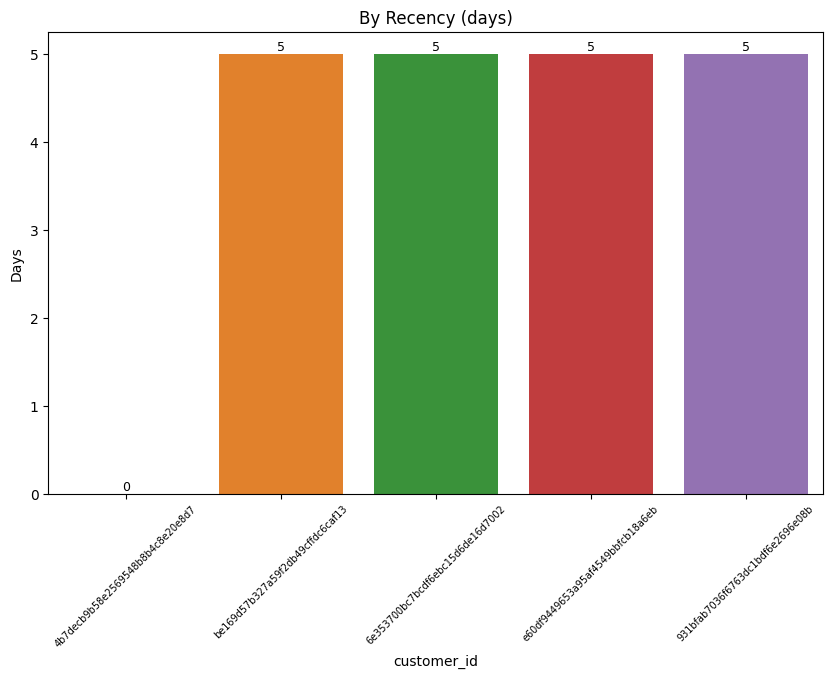

In [28]:
fig, ax = plt.subplots(figsize=(10,6))
ax= (
    sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5)),
    ax.bar_label(ax.containers[0], rotation=0, fontsize=9),
    ax.set(title='By Recency (days)', xlabel='customer_id', ylabel='Days'),
    ax.tick_params(axis ='x', rotation=45, labelsize=7)
)

Based on the Recency Bar Plot, it can be seen that the lowest 5 customer Recency values are 0 days and 5 days.

### Frequency Visualization

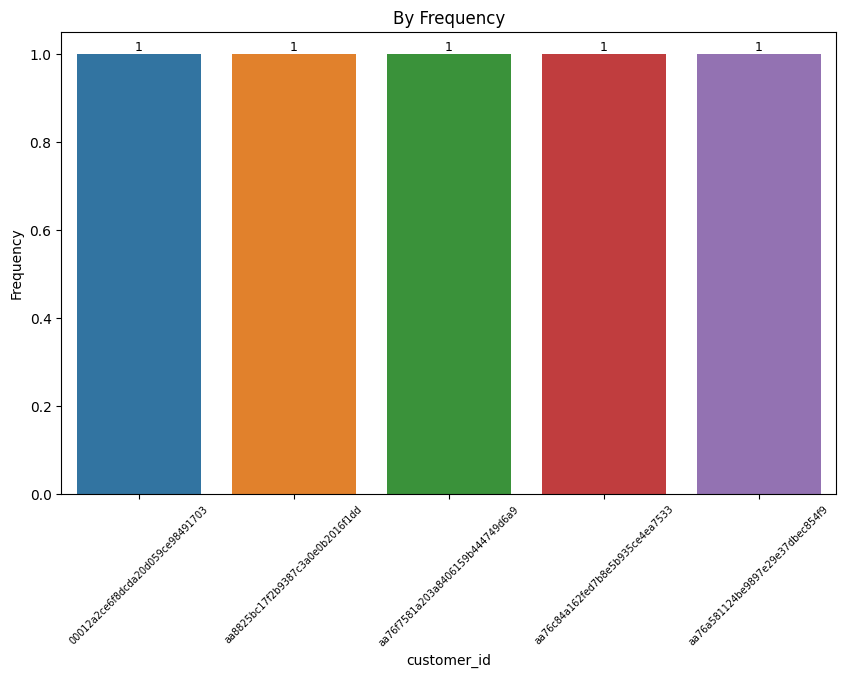

In [29]:
fig, ax = plt.subplots(figsize=(10,6))
ax= (
    sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5)),
    ax.bar_label(ax.containers[0], rotation=0, fontsize=9),
    ax.set(title='By Frequency', xlabel='customer_id', ylabel='Frequency'),
    ax.tick_params(axis ='x', rotation=45, labelsize=7)
)



Based on the Bar Plot Frequency, it can be seen that the Frequency value of the 5 highest customers has the same value as 1 order

### Monetary Visualization

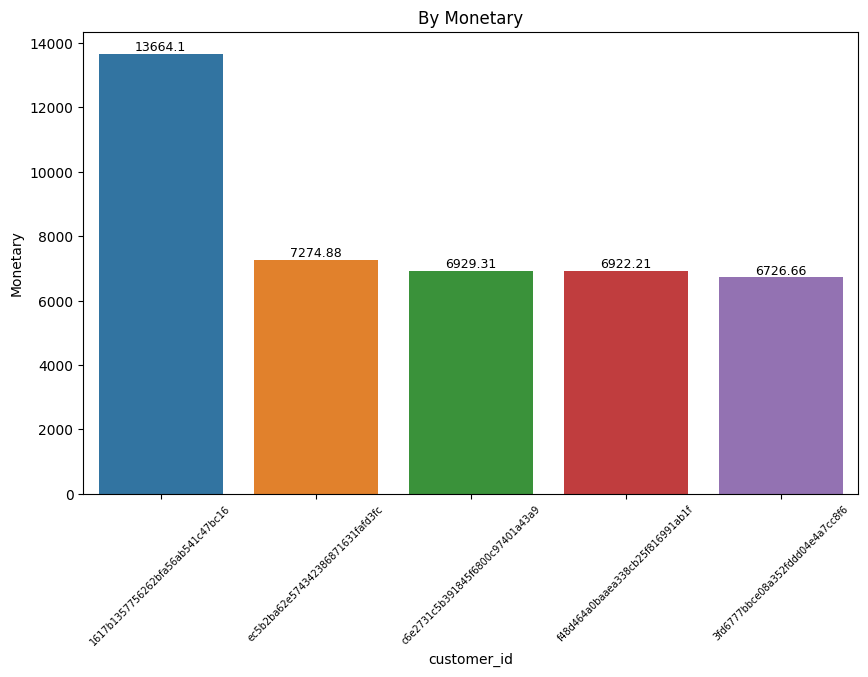

In [30]:
fig, ax = plt.subplots(figsize=(10,6))
ax= (
    sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5)),
    ax.bar_label(ax.containers[0], rotation=0, fontsize=9),
    ax.set(title='By Monetary', xlabel='customer_id', ylabel='Monetary'),
    ax.tick_params(axis ='x', rotation=45, labelsize=7)
)

Based on the Monetary Bar Plot, it can be seen that the largest transaction value is 13664.1 Brazil Real and among the other top 4 the value is not much different, around 6,726.66 to 7,274.88 Brazil Real

## Question 2:

### Histogram Recency By Customer

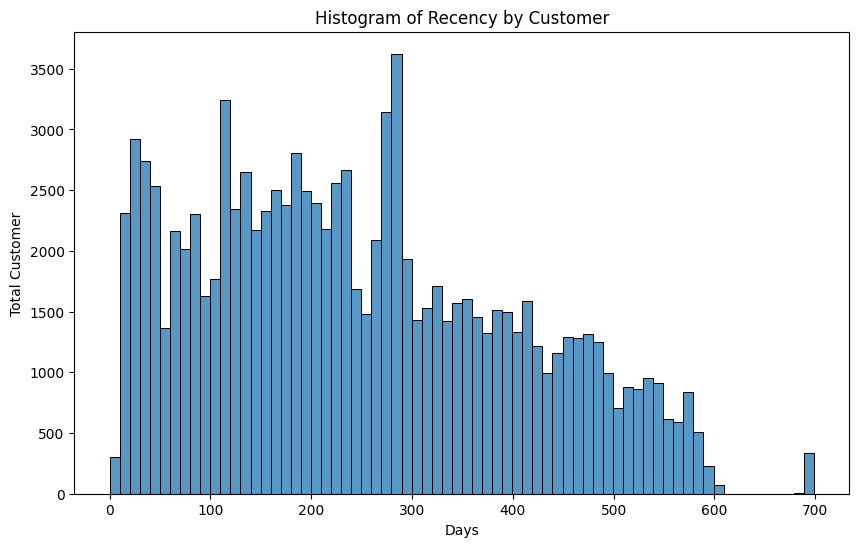

In [31]:
fig, ax = plt.subplots(figsize=(10,6))
ax= (
    sns.histplot(df["recency"]),
    ax.set(title='Histogram of Recency by Customer', xlabel='Days', ylabel='Total Customer')
)

Based on the recency histogram, it can be seen that the distribution of data on days customers place orders tends to be right skewed with days between 0-300 having the highest number of customers placing orders.

## Question 3:

### Total Order By State

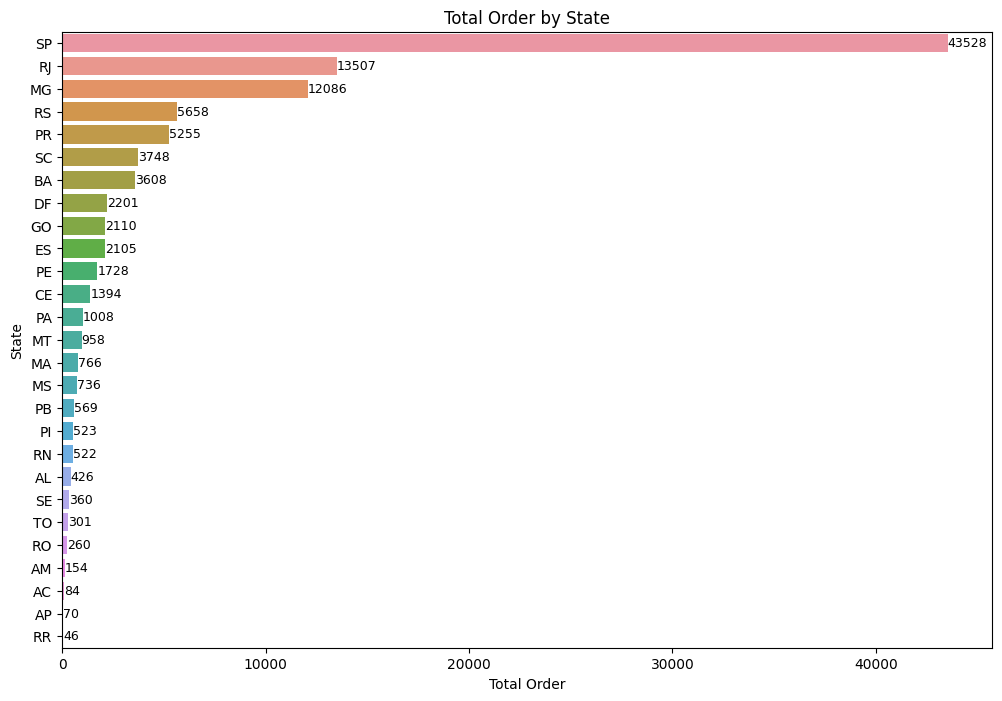

In [32]:
fig, ax = plt.subplots(figsize=(12,8))
ax= (
    sns.barplot(y= df['customer_state'].value_counts().index, x= df['customer_state'].value_counts(), orient='h'),
    ax.bar_label(ax.containers[0], rotation=0, fontsize=9),
    ax.set(title='Total Order by State', ylabel='State', xlabel='Total Order')
)

Based on the Bar Plot of Total Orders by State, it can be seen that the state that has the most orders is SP State with 43,528 while the least is RR State with 46.

## Question 4:

### Total Transaction Value By State

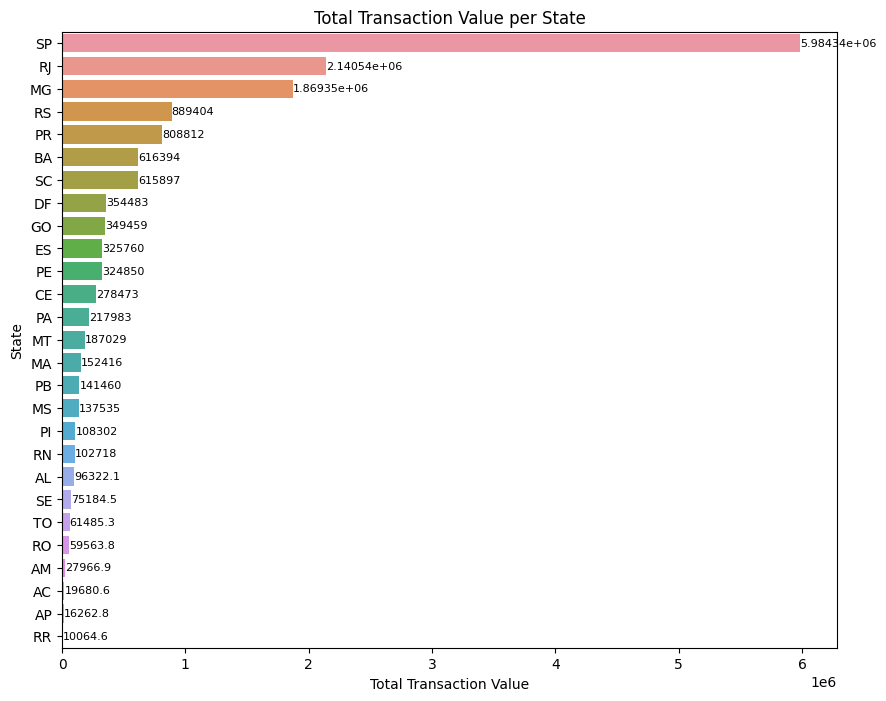

In [33]:
fig, ax = plt.subplots(figsize=(10, 8))
ax= (
    sns.barplot(y= state_payment.sort_values(ascending=False).index, x= state_payment.sort_values(ascending=False), orient='h'),
    ax.bar_label(ax.containers[0], rotation=0, fontsize=8),
    ax.set(title='Total Transaction Value per State', ylabel='State', xlabel='Total Transaction Value'),
)

Based on the bar plot of total transaction value by state, it can be seen that the largest transaction value is owned by SP State with a total of 5,984,340 and the lowest transaction value is RR State with a total of 10,064.6

### Average Transaction Value By State

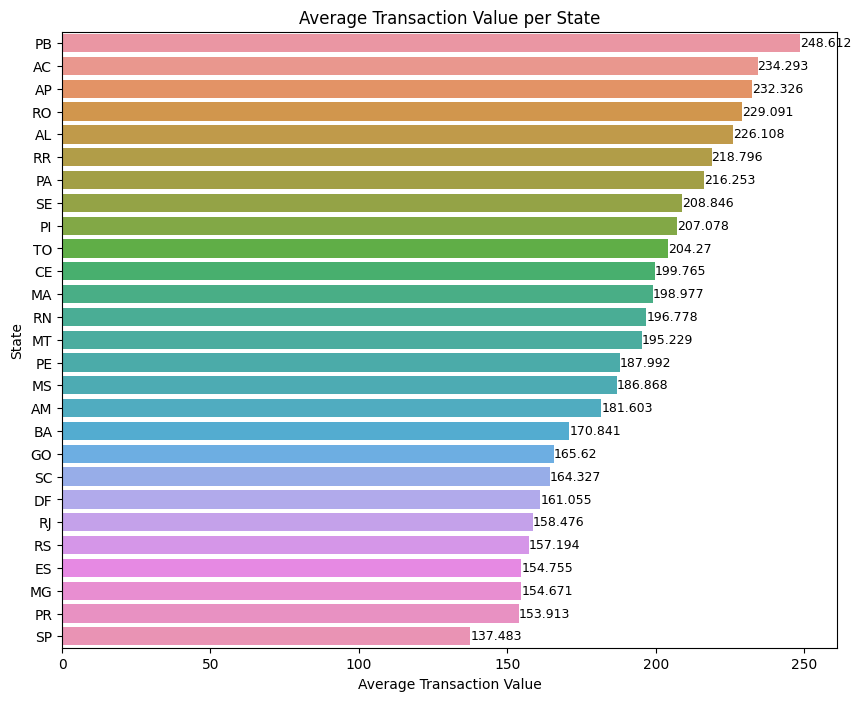

In [34]:
fig, ax = plt.subplots(figsize=(10, 8))
ax= (
    sns.barplot(y= state_avg_payment.sort_values(ascending=False).index, x= state_avg_payment.sort_values(ascending=False), orient='h'),
    ax.bar_label(ax.containers[0], rotation=0, fontsize=9),
    ax.set(title='Average Transaction Value per State', ylabel='State', xlabel='Average Transaction Value'),
)

Based on the bar plot of average transaction value by state, it can be seen that the largest average transaction value is in PB state with an average transaction value of 248.612 Brazilian Real while the smallest average transaction value is in SP state with a transaction value of 137.483

## Question 5:

### Total Transaction Value Based on Month

<ipython-input-89-fc8ae3c42d13>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


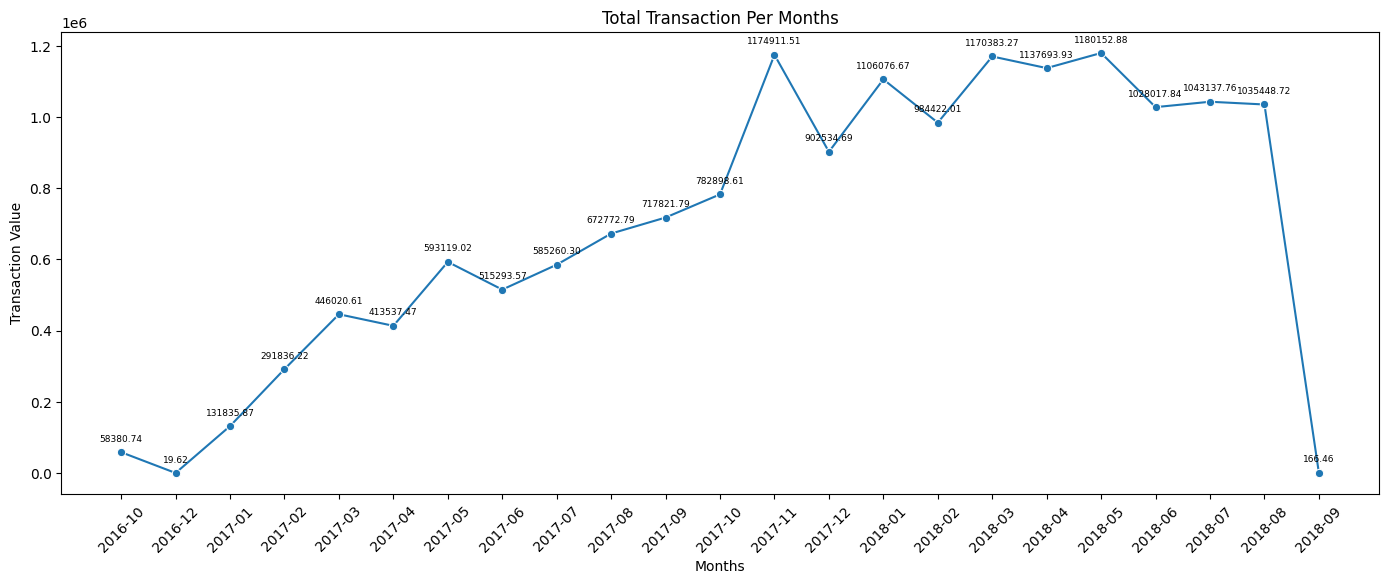

In [89]:
fig, ax = plt.subplots(figsize=(17,6))
ax= (
    sns.lineplot(x= sum_per_month.index, y= sum_per_month, marker='o'),
    ax.set(title='Total Transaction Per Months', xlabel='Months', ylabel='Transaction Value'),
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
)
for i, txt in enumerate(sum_per_month):
      plt.text(sum_per_month.index[i], y=txt+50000, s = f'{txt:.2f}'.format(txt), ha='center', va='top',  fontsize=6.5)

Based on the line plot of Total Transactions per Month, it can be seen that the total transaction value tends to increase with the highest total transaction value being in November 2017 and the lowest total transaction value being in December 2016

### Average Transaction Value by Month

<ipython-input-94-25eef06146e3>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


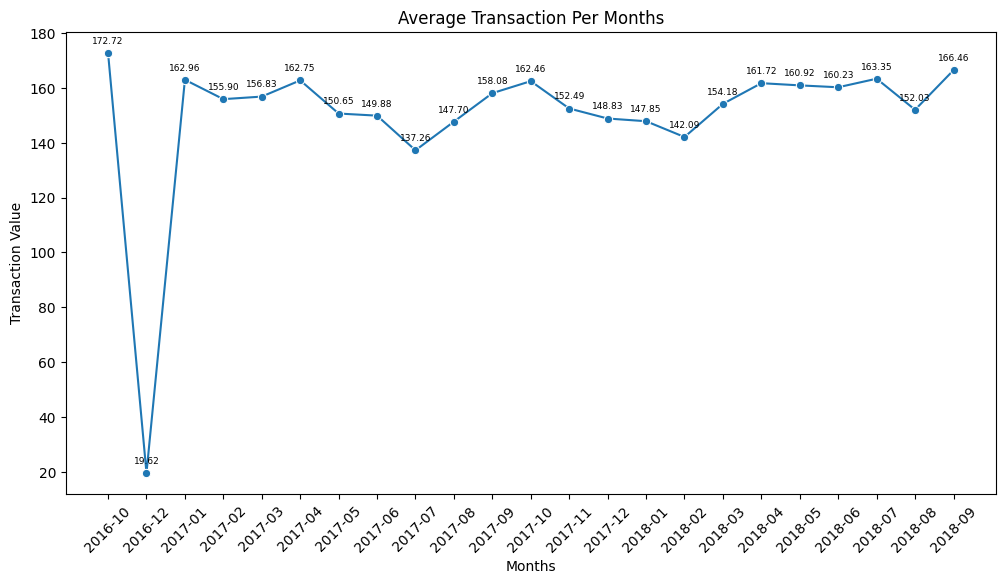

In [94]:
fig, ax = plt.subplots(figsize=(12,6))
ax= (
    sns.lineplot(x= avg_per_month.index, y= avg_per_month, marker='o'),
    ax.set(title='Average Transaction Per Months', xlabel='Months', ylabel='Transaction Value'),
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
)
for i, txt in enumerate(avg_per_month):
      plt.text(avg_per_month.index[i], y=txt+6, s = f'{txt:.2f}'.format(txt), ha='center', va='top',  fontsize=6.5)

Based on the line plot of Average Transactions per Month, it can be seen that the average transaction value tends to be stagnant with the highest average transaction value being in October 2016 and the lowest average transaction value being in December 2016

# **Conclusion**

After analyzing the data, I can draw conclusions based on the results of the analysis to help answer the questions I raised.

1. With the RFM analysis that has been carried out, the results can be concluded:
* Based on recency, the customer made a purchase some time ago but has not been active recently,
* based on frequency, customers only make one purchase and there are no repeat purchases,
* Based on the monetary side, customers tend to buy with a fairly high spending value.
2. The distribution of customers who used e-commerce the last time they placed an order tends to be right skewed because the longest number of days a customer has not placed an order decreases, whereas most customers tend to use e-commerce to place an order between 0-300 days.
3. The state with the most orders by customers is the SP state and the state with the fewest orders by users is the RR state.
4. The state with the highest total transaction value is SP State and the highest average transaction value is PB State.
5. The month with the highest total transaction value was November 2017 and the highest average transaction value was October 2016.